This notebook demonstrates the resampling algorithm used to reproject ESA EE SMOS Level-2 products.

In [2]:
import os.path

import numpy as np
import xarray as xr

from xcube_smos.dgg import SmosDiscreteGlobalGrid
from xcube_smos.l2prod import SmosMappedL2Product

from xcube.core.gridmapping import GridMapping

The SMOS discrete global grid. Installed by SNAP SMOS-Box in "~/.snap/auxdata":

In [3]:
dgg_path = os.path.expanduser("~/.snap/auxdata/smos-dgg/grid-tiles")

Path for a random SMOS Level-2 NetCDF product which serves as an example. It respresents a single time step in a future SMOS Level-2C data cube:

In [5]:
l2_product_path = "../testdata/SM/SM_OPER_MIR_SMUDP2_20230401T173625_20230401T182938_700_001_1.nc"

---

### The SMOS Discrete Global Grid

In [6]:
dgg = SmosDiscreteGlobalGrid(dgg_path)

In [7]:
dgg.num_levels

5

In [8]:
dgg_ds_0 = dgg.get_dataset(0)

In [10]:
dgg_ds_0

<xarray.Dataset>
Dimensions:  (lat: 8064, lon: 16384)
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

Grid mapping uses CRS **EPSG:4326**. Level 0 has **16384 x 8064 pixels** a spatial resolution of **0.0219 degrees**:

In [11]:
GridMapping.from_dataset(dgg_ds_0)

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.02197275, 0.02197275)
* xy_bbox: (-180, -88.593750046875, 180, 88.593750046875)
* ij_bbox: (0, 0, 16384, 8064)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (16384, 8064)
* tile_size: (512, 504)

In [12]:
dgg_ds_2 = dgg.get_dataset(2)

In [13]:
dgg_ds_2

<xarray.Dataset>
Dimensions:  (lat: 2016, lon: 4096)
Coordinates:
  * lat      (lat) float64 88.55 88.46 88.37 88.29 ... -88.37 -88.46 -88.55
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

Level 2 has **4096 x 2016 pixels** and a spatial resolution of **0.0879 degrees**:

In [14]:
GridMapping.from_dataset(dgg_ds_2)

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.0878905, 0.0878905)
* xy_bbox: (-180, -88.5937499375, 180, 88.5937499375)
* ij_bbox: (0, 0, 4096, 2016)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (4096, 2016)
* tile_size: (512, 504)

`seqnum` is a chunked 2-D array:

In [15]:
dgg_ds_2.seqnum

<xarray.DataArray 'seqnum' (lat: 2016, lon: 4096)>
dask.array<open_dataset-0d3e7c73e9b6cc5e7824c364ce8403d8seqnum, shape=(2016, 4096), dtype=uint32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.55 88.46 88.37 88.29 ... -88.37 -88.46 -88.55
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0

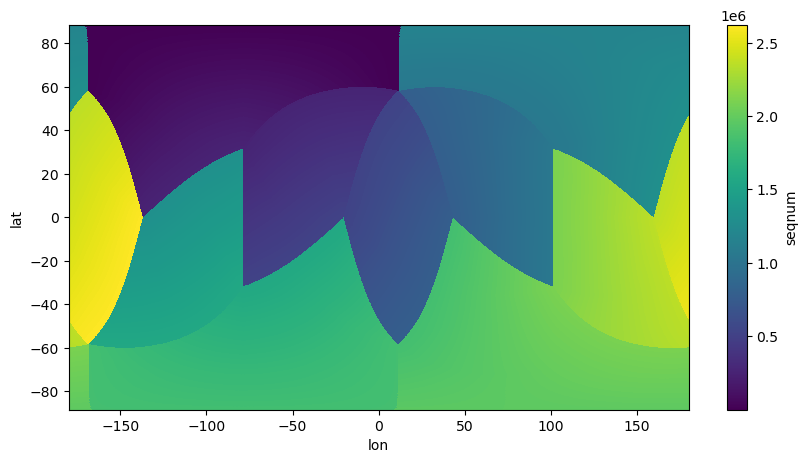

In [16]:
dgg_ds_2.seqnum.plot.imshow(figsize=(10, 5))

---

### The SMOS L2C Product

We open here a single Level-2 NetCDF product that will later serve a single time step. 

It is opened for the provided discrete global grid `dgg` that applies to all Level-2 NetCDF products.

In [17]:
mapped_l2 = SmosMappedL2Product.open(l2_product_path, dgg)

Because the `dgg` is a multi-resolution pyramid comprising 5 levels, the L2C product is too:

In [18]:
mapped_l2.num_levels

5

This is the original SMOS Level-2 product with the 1-D variables:

In [21]:
l2_product = mapped_l2.l2_product
l2_product

<xarray.Dataset>
Dimensions:            (n_grid_points: 82099)
Dimensions without coordinates: n_grid_points
Data variables:
    N_RFI_Y            (n_grid_points) uint16 ...
    N_RFI_X            (n_grid_points) uint16 ...
    Soil_Moisture_DQX  (n_grid_points) float32 ...
    Chi_2              (n_grid_points) uint8 ...
    RFI_Prob           (n_grid_points) uint8 ...
    Chi_2_P            (n_grid_points) uint8 ...
    Soil_Moisture      (n_grid_points) float32 ...
Attributes: (12/364)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                        ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

Here we plot the coordinate variables `Longitude` and `Latitude` as dots into a global map (note this is a vector graphic):

AttributeError("'Dataset' object has no attribute 'Longitude'")

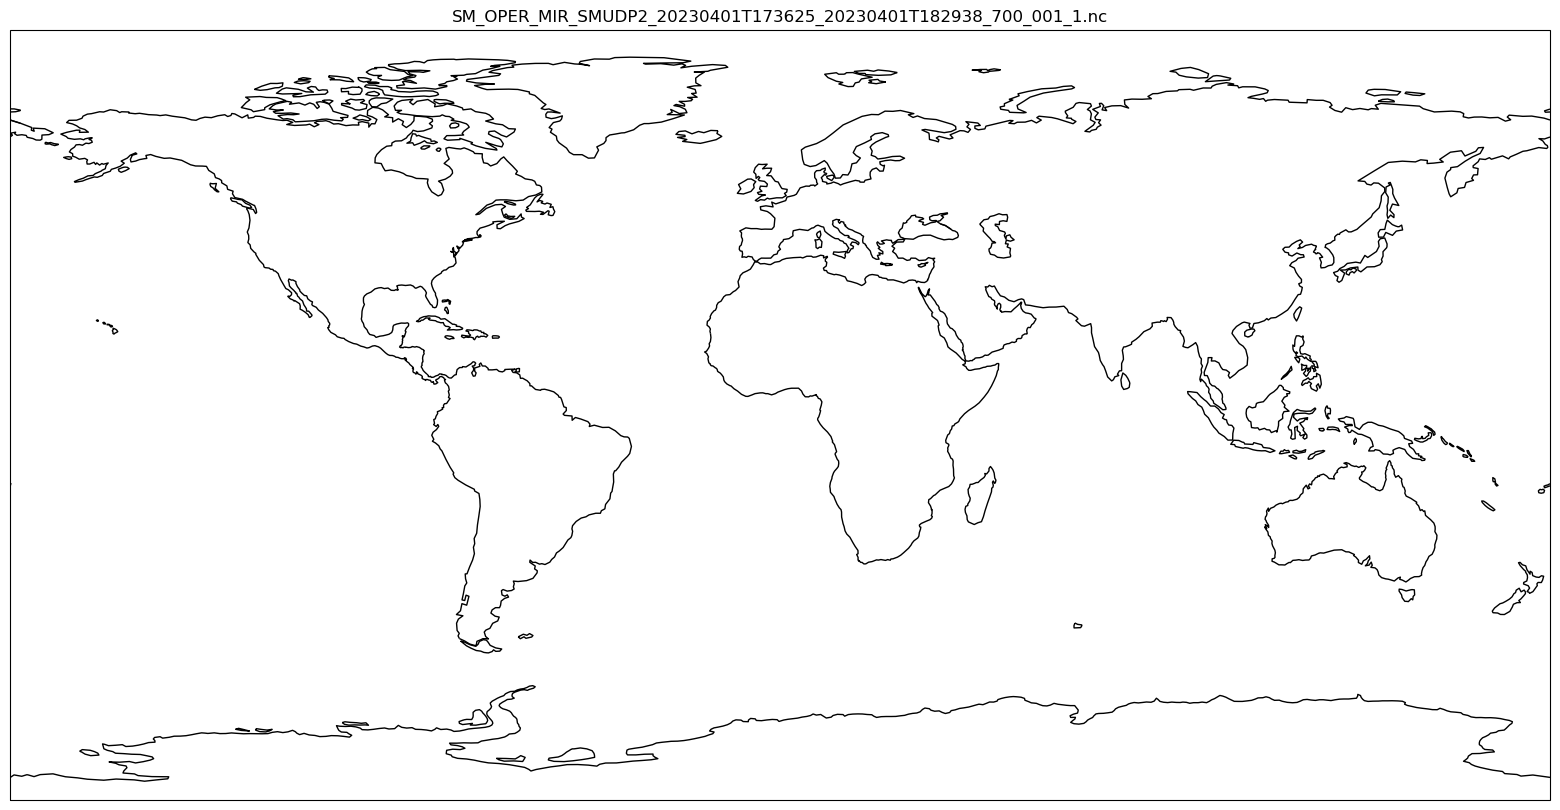

In [22]:
try:
    import cartopy.crs
    import matplotlib.pyplot as plt
    
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    plt.title(os.path.basename(l2_product_path))
    ax.set_extent([-180, 180, -90, 90], cartopy.crs.PlateCarree())
    ax.figure.set_size_inches(20, 10)
    ax.coastlines(resolution='110m')
    plt.scatter(l2_product.Longitude, l2_product.Latitude)
    plt.show()
except (ImportError, AttributeError) as e:
    display(e)

Next we display the computed array indices for the given SMOS product as an image:

In [23]:
mapped_l2.l2_index

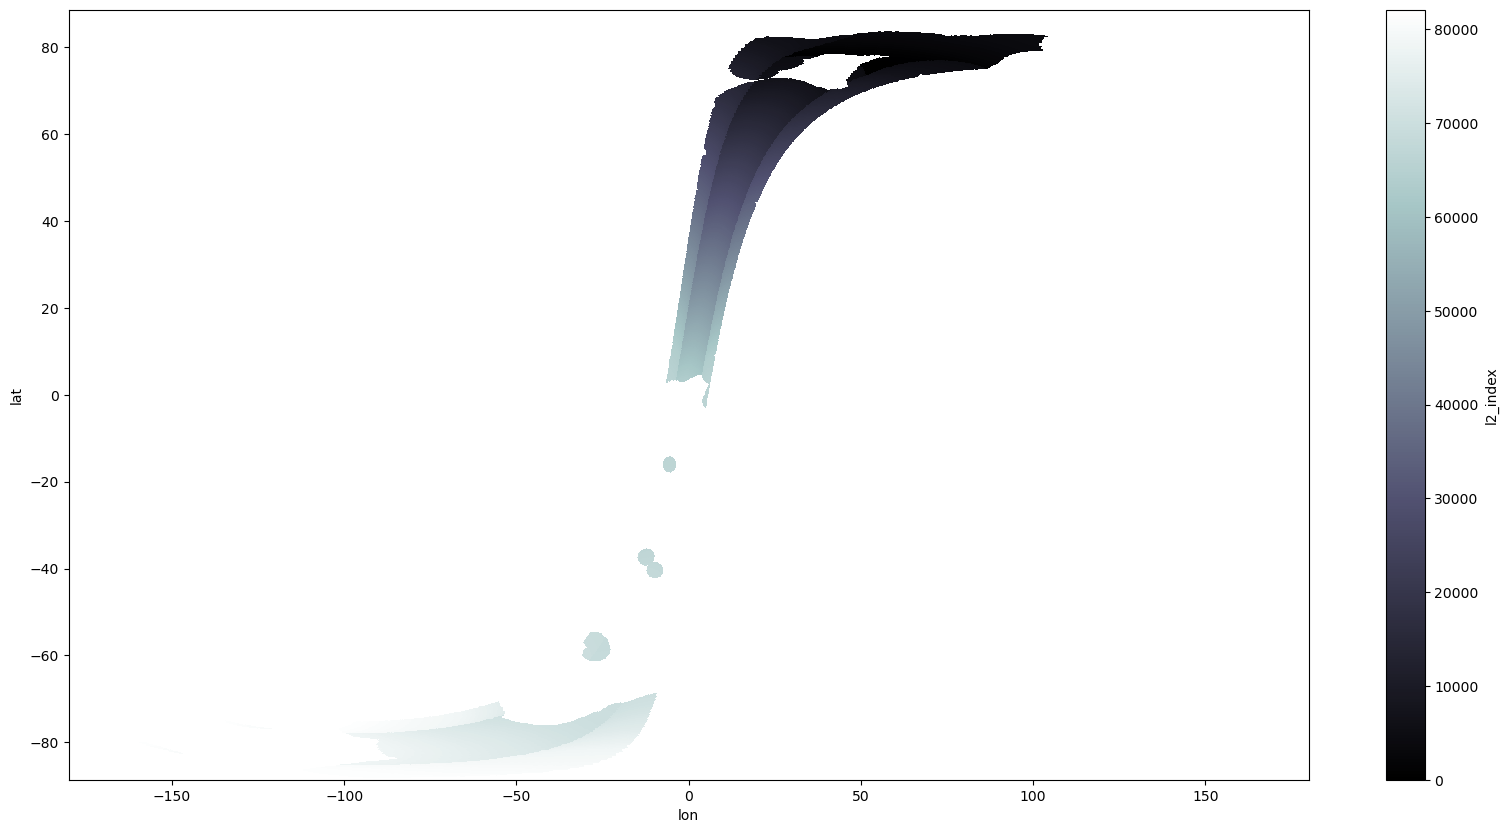

In [24]:
mapped_l2.l2_index.get_dataset(0).l2_index.plot.imshow(figsize=(20, 10), cmap="bone")

This is the actual mapped SMOS L2C product at level 2:

In [25]:
l2_ds_2 = mapped_l2.get_dataset(2)
l2_ds_2

<xarray.Dataset>
Dimensions:            (lat: 2016, lon: 4096)
Coordinates:
  * lat                (lat) float64 88.55 88.46 88.37 ... -88.37 -88.46 -88.55
  * lon                (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    N_RFI_Y            (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    N_RFI_X            (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Soil_Moisture_DQX  (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Chi_2              (lat, lon) uint8 dask.array<chunksize=(504, 512), meta=np.ndarray>
    RFI_Prob           (lat, lon) uint8 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Chi_2_P            (lat, lon) uint8 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Soil_Moisture      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
Attributes: (12/364)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                        ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

In [26]:
l2_ds_2.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (lat: 2016, lon: 4096)>
dask.array<map_l2_values, shape=(2016, 4096), dtype=float32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.55 88.46 88.37 88.29 ... -88.37 -88.46 -88.55
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

Because the underlying Level-2 product has been opened using `decode_cf=False`, the value -999 _is not_ turned into NaN:

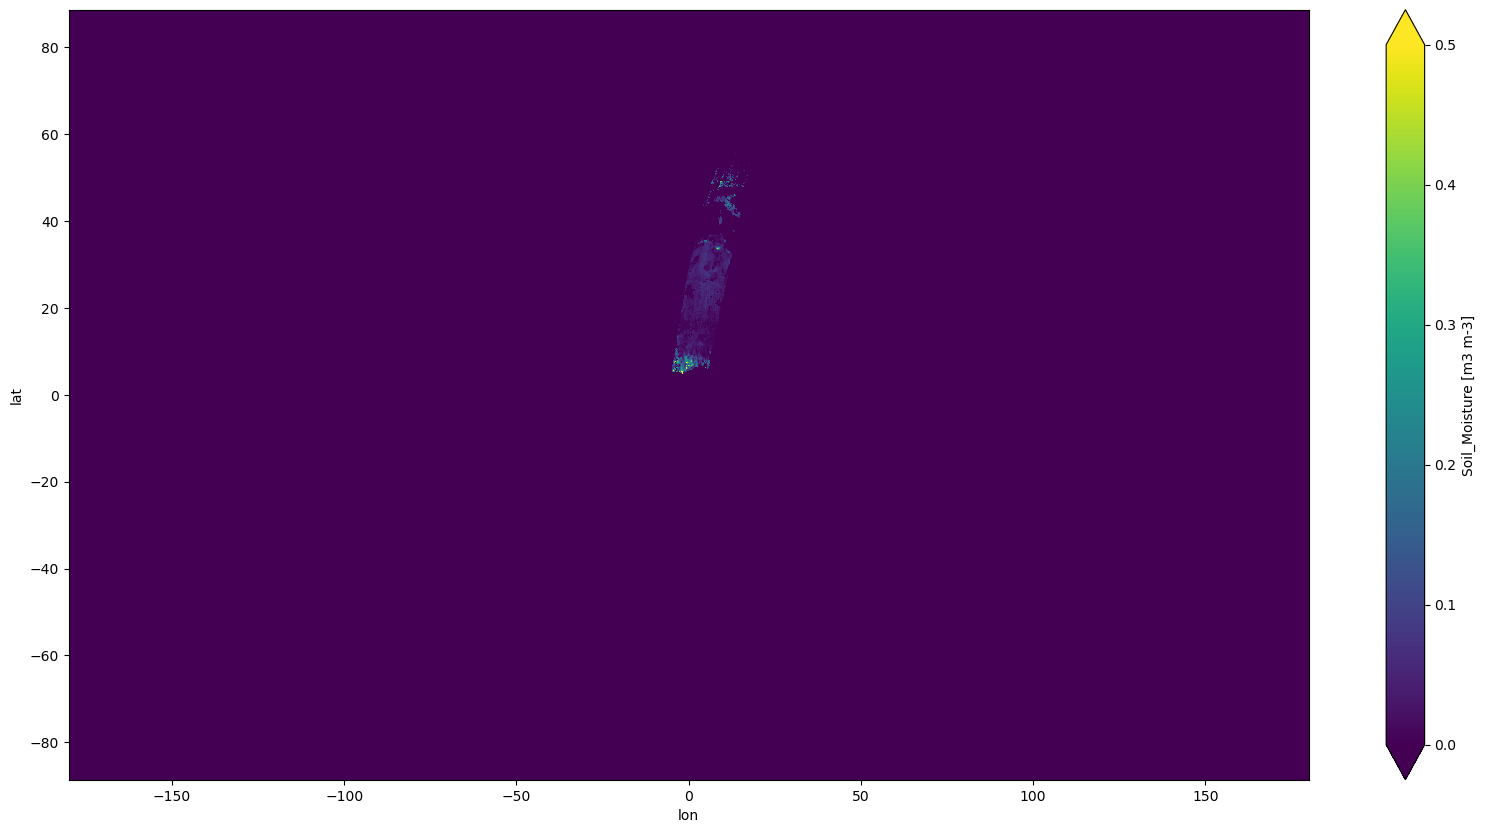

In [27]:
l2_ds_2.Soil_Moisture.plot.imshow(figsize=(20, 10), vmin=0, vmax=0.5)

Skip negative value by `vmin=0`:

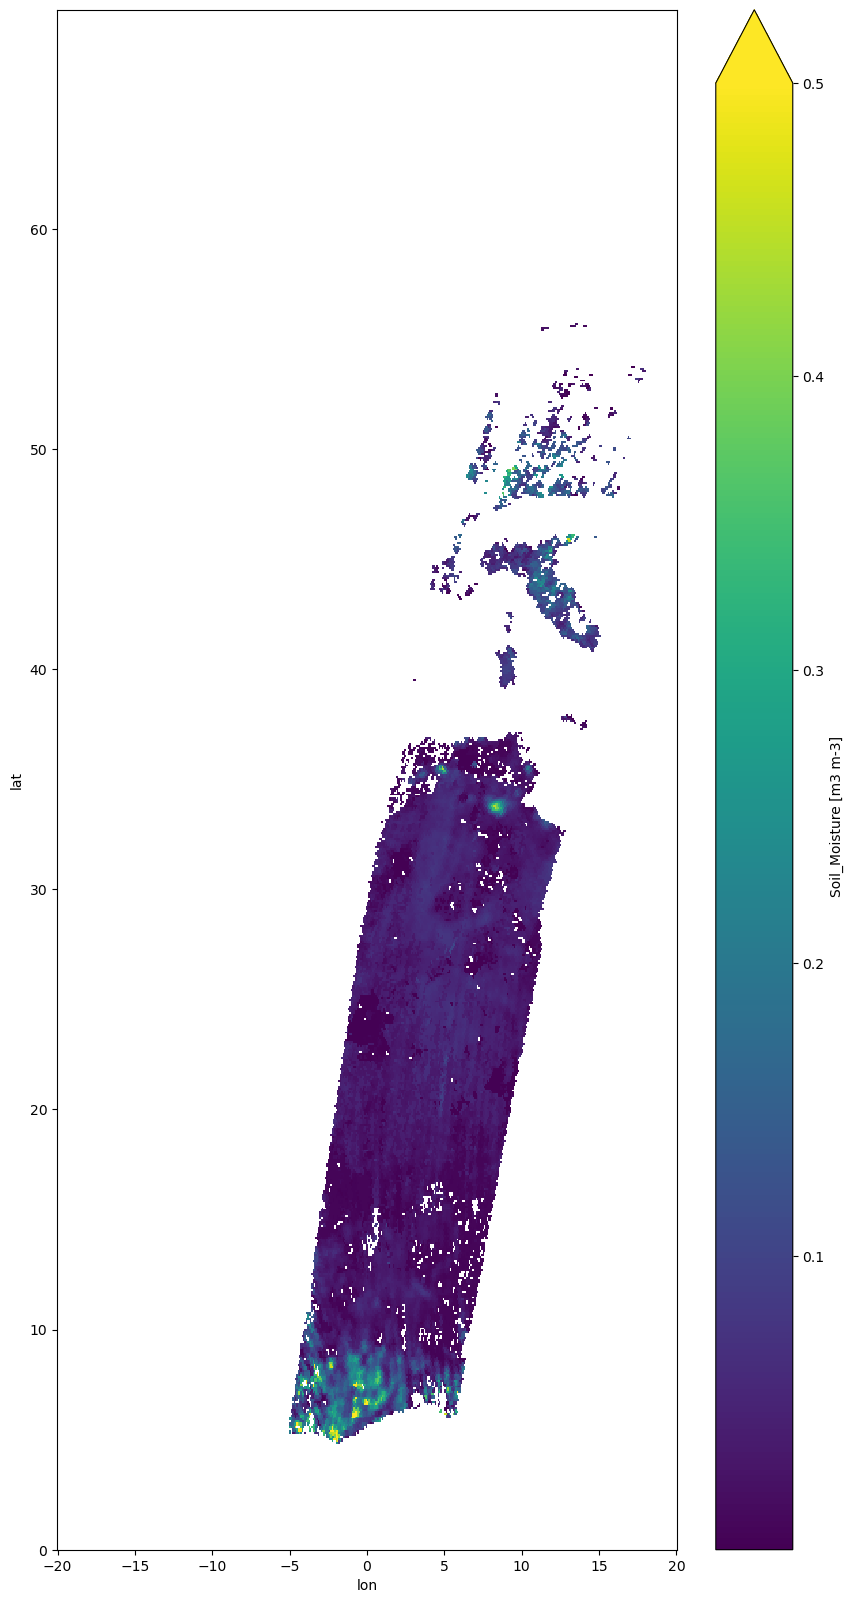

In [28]:
sm_subset = l2_ds_2.Soil_Moisture.sel(lon=slice(-20., 20.), lat=slice(70., 0.))
sm_subset.where(sm_subset != -999, np.nan).plot.imshow(figsize=(10, 20), vmax=0.5)

Close up of the above:

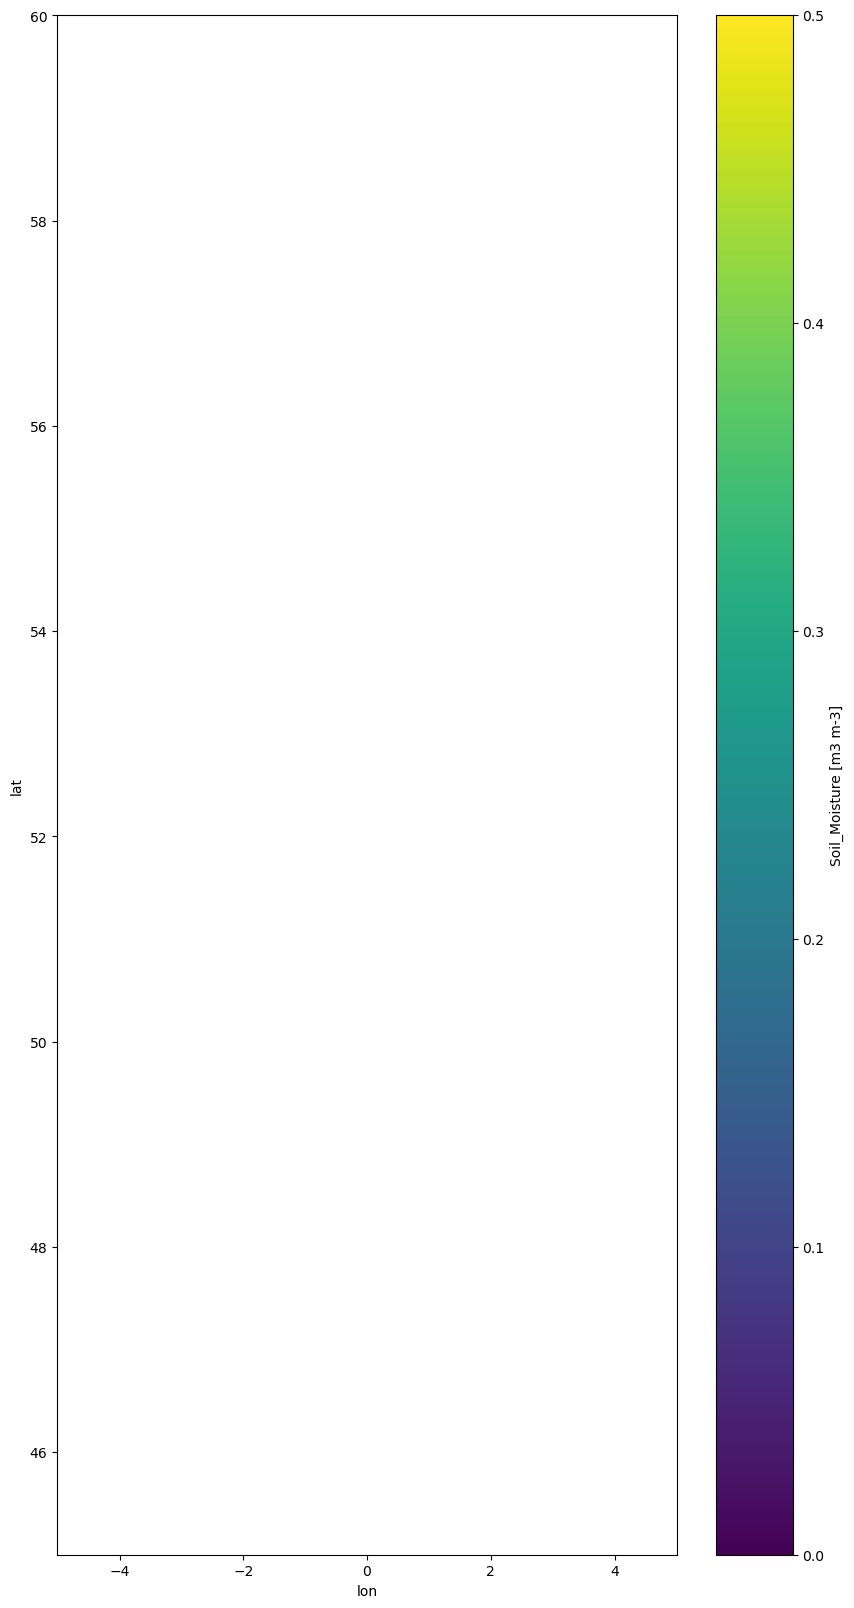

In [29]:
sm_subset = mapped_l2.get_dataset(0).Soil_Moisture.sel(lon=slice(-5., 5.), lat=slice(60., 45.))
sm_subset.where(sm_subset != -999, np.nan).plot.imshow(figsize=(10, 20), vmax=0.5)

### The End

---

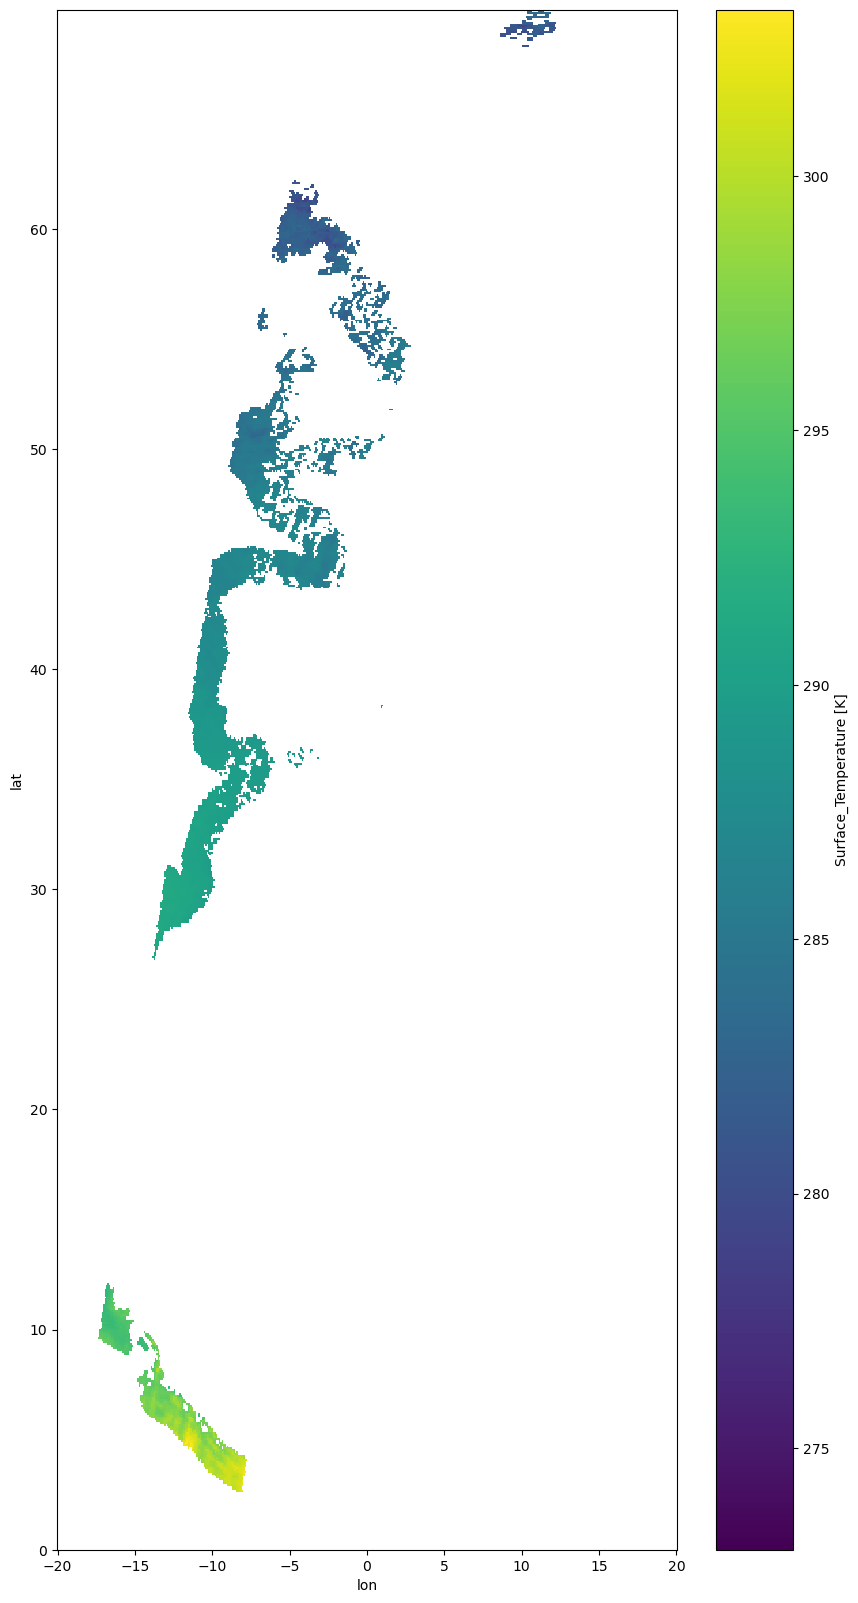

In [25]:
st_subset = l2_ds_2.Surface_Temperature.sel(lon=slice(-20., 20.), lat=slice(70., 0.))
st_subset.where(st_subset != -999, np.nan).plot.imshow(figsize=(10, 20), vmin=273)

---

Try writing as Zarr and skipping empty chunks:

In [26]:
import shutil
import json
import zarr
import dask.array as da
import numcodecs
import numpy as np

from xcube.core.store import new_data_store

In [27]:
encodings = {
    var_name: {**var.encoding, "write_empty_chunks": False}
    for var_name, var in mapped_l2.base_dataset.data_vars.items()
}

In [28]:
store = new_data_store("file", root="")

In [29]:
mapped_l2_levels_path = os.path.splitext(l2_product_path)[0] + ".levels"
mapped_l2_levels_path

'../testdata/SM_OPER_MIR_SMUDP2_20220405T182911_20220405T192224_700_001_1.levels'

In [30]:
shutil.rmtree(mapped_l2_zarr_path, ignore_errors=True)

NameError: name 'mapped_l2_zarr_path' is not defined

In [ ]:
store.write_data(mapped_l2, mapped_l2_levels_path, encoding=encodings, replace=True)

In [ ]:
store.open_data(mapped_l2_levels_path).num_levels

In [ ]:
import shutil
import json
import zarr
import dask.array as da
import numcodecs
import numpy as np

In [ ]:
mapped_l2_zarr_path = os.path.splitext(l2_product_path)[0] + ".zarr"

In [ ]:
shutil.rmtree(mapped_l2_zarr_path, ignore_errors=True)

encodings = {
    var_name: {**var.encoding, "write_empty_chunks": False}
    for var_name, var in l2_ds_0.data_vars.items()
}

l2_ds_2.to_zarr(mapped_l2_zarr_path, mode="w", encoding=encodings)